In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = str(1)

In [2]:
start_iter = 0
end_iter = 2

In [3]:
import tensorflow_probability.substrates.jax as tfp
import jax
import optax
from functools import partial
import seaborn as sns
import tensorflow as tf
dist = tfp.distributions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.stats as st
import random
from dataloader import *
from utilities import *
from model import *
from retrain_fun import *
random.seed(0)
np.random.seed(0)
jax.random.PRNGKey(0)
os.environ["XLA_FLAGS"] = "--xla_gpu_deterministic_reductions --xla_gpu_autotune_level=2"
os.environ['TF_CUDNN_DETERMINISTIC']='1'


2023-05-27 10:33:59.680078: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-27 10:34:02.430186: E external/org_tensorflow/tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:429] Could not create cudnn handle: CUDNN_STATUS_NOT_INITIALIZED
2023-05-27 10:34:02.430331: E external/org_tensorflow/tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:438] Possibly insufficient driver version: 525.85.12
2023-05-27 10:34:02.431407: E external/org_tensorflow/tensorflow/compiler/xla/status_macros.cc:57] INTERNAL: RET_CHECK failure (external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_compiler.cc:626) dnn != nullptr 
*** Begin stack trace ***
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	
	_PyObject_MakeTpCall
	
	_PyEval_EvalFrameDefault
	
	_PyEval_EvalFrameDefault
	
	_PyFunction_Vectorcall
	_PyEval_EvalFrameDefault
	
	_PyEval_EvalFrameDefault
	
	_PyFunction_Vectorcall
	PyObject_Call
	_PyEval_EvalFrameDefault
	
	_PyFunction_Vectorcall


XlaRuntimeError: INTERNAL: RET_CHECK failure (external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_compiler.cc:626) dnn != nullptr 

In [ ]:
data_aggregated, houses = data_preprocess(only_positive=True)

In [ ]:
train_list= [ [2361, 7719, 9019, 2335, 7951]]
test_list= [[4373, 7901, 3456, 3538, 2818]]
pool_list=[]
for i in range(len(train_list)):
    pool = [j for j in houses if j not in train_list[i]+test_list[i]]
    pool_list.append(pool)

In [ ]:
random_picks = [[8156, 661, 7800, 8386, 8565, 5746, 9278, 7536, 1642, 9160],
 [7800, 9160, 8565, 661, 1642, 9278, 8156, 7536, 5746, 8386],
 [8565, 9160, 8386, 661, 5746, 7536, 7800, 1642, 9278, 8156],
 [7800, 7536, 661, 8386, 9278, 1642, 8565, 5746, 9160, 8156],
 [7536, 7800, 8156, 9278, 661, 5746, 8386, 8565, 9160, 1642],
 [661, 8156, 9278, 7800, 8386, 7536, 9160, 1642, 5746, 8565],
 [661, 1642, 8386, 9160, 9278, 5746, 7536, 8156, 8565, 7800],
 [7800, 9278, 1642, 5746, 7536, 8156, 9160, 8565, 8386, 661],
 [5746, 661, 9160, 8156, 9278, 8565, 7536, 8386, 1642, 7800],
 [7800, 8565, 8156, 8386, 7536, 9278, 661, 1642, 5746, 9160]]


STARTING FOR all appliances, FOR ITERATIONS - 2 to 4
############################################Random iteration number#################################### : 3
I am pool houses picck [8565, 9160, 8386, 661, 5746, 7536, 7800, 1642, 9278, 8156]
-------------------------------------------Iteration No:----------------------------------------- -> 2.0
(50495, 5)


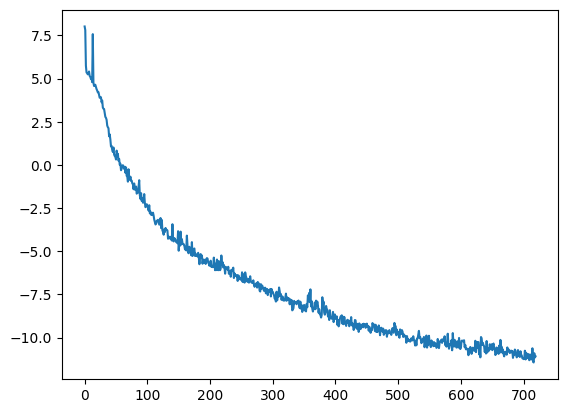

(2, 58739, 5)
RMSE : [838.97186   65.4115   283.74158   52.868984 462.44693 ] MAE  : [328.1383    41.170593 121.62969   22.690022 248.00345 ] NLL : 6362.65625
I am random house id = 8565
I am pool houses [8565, 9160, 8386, 661, 5746, 7536, 7800, 1642, 9278, 8156]
(array([0]),)
[0]
0
-------------------------------------------Iteration No:----------------------------------------- -> 2.1


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8565]


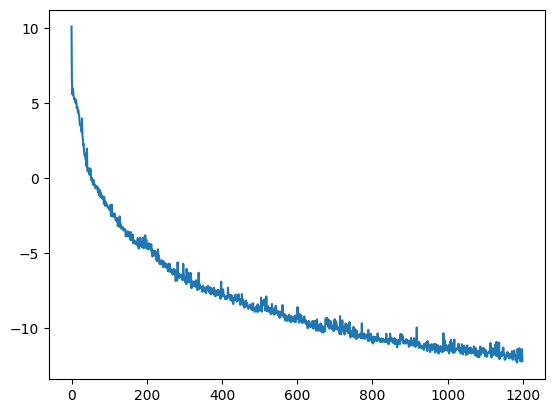

RMSE : [711.6935   64.7342  146.73427 100.89147 341.7312 ] MAE  : [284.8349    41.870953  77.33822   44.360107 160.0484  ] NLL : 194.59950256347656
-------------------------------------------Iteration No:----------------------------------------- -> 2.2


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8565 9160]


2023-05-21 11:30:49.548526: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[116382,50,99]{2,1,0}, u8[0]{0}) custom-call(f32[116382,50,99]{2,1,0}, f32[50,50,5]{2,1,0}), window={size=5 pad=2_2}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


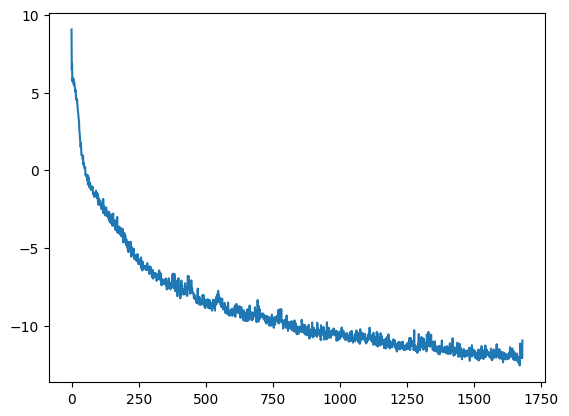

RMSE : [391.74457   61.677315  87.1175    45.546276 204.02817 ] MAE  : [152.17795   38.644802  46.792633  18.84757   79.70134 ] NLL : 5.202502250671387
-------------------------------------------Iteration No:----------------------------------------- -> 2.3


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8565 9160 8386]


2023-05-21 11:31:12.405957: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[163423,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[163423,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-21 11:31:13.497226: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[163423,50,99]{2,1,0}, u8[0]{0}) custom-call(f32[163423,40,99]{2,1,0}, f32[50,40,5]{2,1,0}), window={size=5 pad=2_2}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05

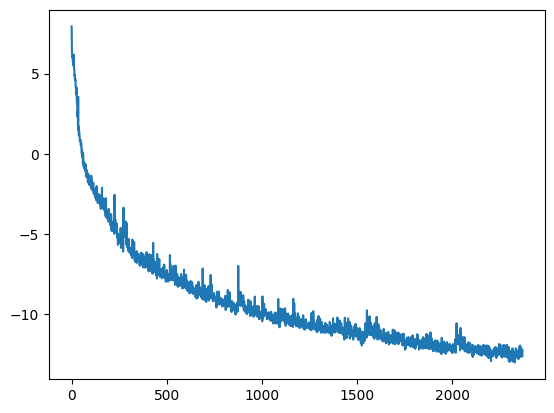

RMSE : [282.30402   59.863377  82.58821   27.60461  142.84349 ] MAE  : [106.09906   37.487843  46.909847  10.304191  56.837227] NLL : 4.632917404174805
-------------------------------------------Iteration No:----------------------------------------- -> 2.4


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8565 9160 8386  661]


2023-05-21 11:31:42.395242: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[225389,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[225389,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-21 11:31:43.540725: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[225389,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[225389,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-21 11:

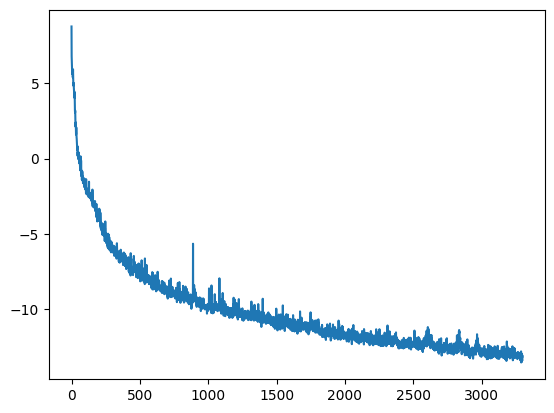

RMSE : [272.0118    57.579937  73.88264   27.146313 151.78856 ] MAE  : [97.32232  34.95679  39.72669  10.695756 52.684826] NLL : 4.674717426300049
-------------------------------------------Iteration No:----------------------------------------- -> 2.5


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8565 9160 8386  661 5746]


2023-05-21 11:32:22.245528: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[278804,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[278804,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-21 11:32:23.645925: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[278804,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[278804,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-21 11:

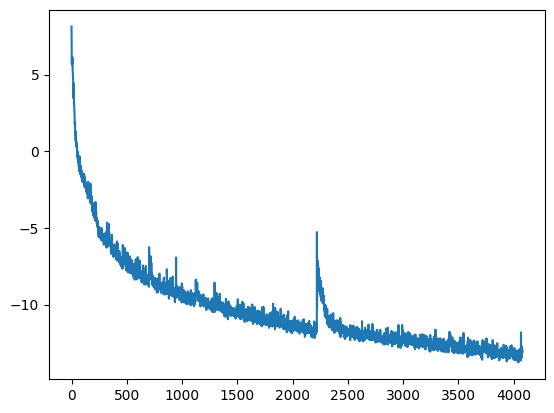

RMSE : [233.50919   55.82385   75.98565   44.848183 147.752   ] MAE  : [82.66035  33.082222 39.014862 16.108322 54.956657] NLL : 4.508976936340332
-------------------------------------------Iteration No:----------------------------------------- -> 2.6


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8565 9160 8386  661 5746 7536]


2023-05-21 11:33:10.219693: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[341361,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[341361,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-21 11:33:11.901584: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[341361,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[341361,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-21 11:

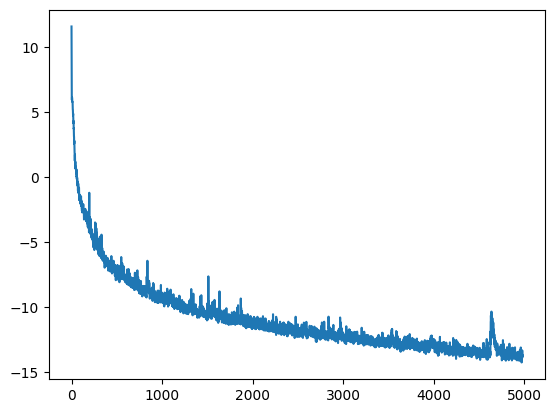

RMSE : [223.51172   54.75712   84.91993   30.811382  97.44387 ] MAE  : [78.73936  31.709208 41.981686  9.62108  28.268442] NLL : 4.718347072601318
-------------------------------------------Iteration No:----------------------------------------- -> 2.7


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8565 9160 8386  661 5746 7536 7800]


2023-05-21 11:34:07.034706: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[408667,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[408667,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-21 11:34:09.026867: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[408667,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[408667,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-21 11:

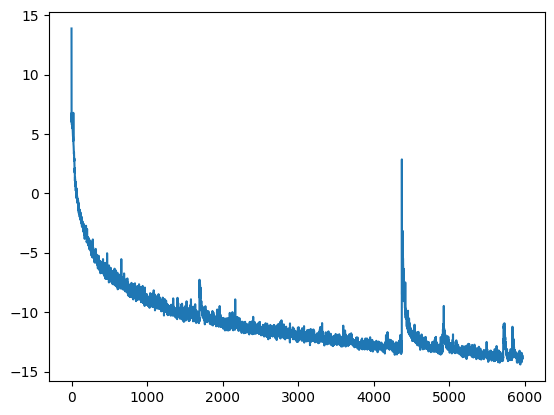

RMSE : [262.82312   55.520752  77.57361   29.34733   85.57531 ] MAE  : [92.519516 32.19662  38.819656 10.132569 21.549494] NLL : 4.767753601074219
-------------------------------------------Iteration No:----------------------------------------- -> 2.8


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8565 9160 8386  661 5746 7536 7800 1642]


2023-05-21 11:35:13.427623: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[483319,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[483319,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-21 11:35:15.763349: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[483319,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[483319,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


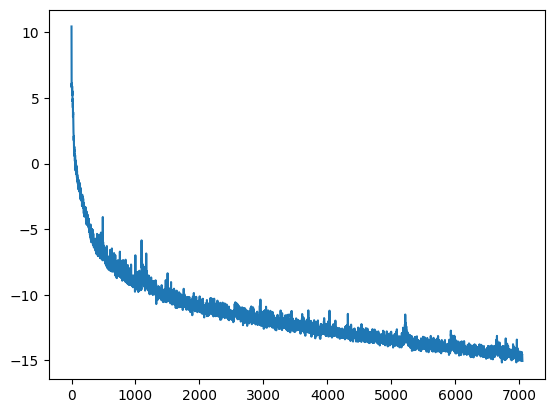

RMSE : [179.96426   52.582222  67.7484    26.909748  57.80062 ] MAE  : [58.425663  29.74659   32.52493    5.9749537  8.400144 ] NLL : 9.70987606048584
-------------------------------------------Iteration No:----------------------------------------- -> 2.9


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8565 9160 8386  661 5746 7536 7800 1642 9278]


2023-05-21 11:36:30.773608: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[562459,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[562459,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-21 11:36:33.434340: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[562459,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[562459,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


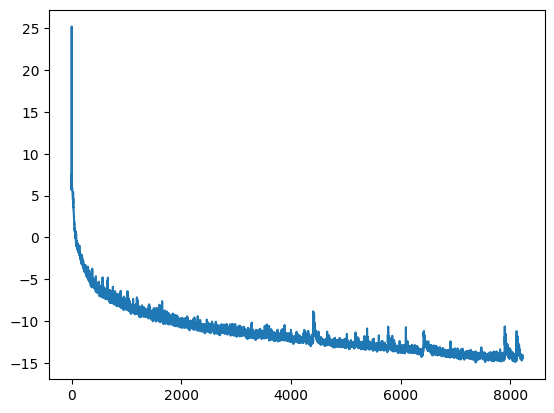

RMSE : [143.46056   51.32658   81.431915  23.710533  58.7288  ] MAE  : [45.891     28.66179   37.516655   6.3228574  9.1301155] NLL : 5.120265483856201
############################################Random iteration number#################################### : 4
I am pool houses picck [7800, 7536, 661, 8386, 9278, 1642, 8565, 5746, 9160, 8156]
-------------------------------------------Iteration No:----------------------------------------- -> 3.0
(50495, 5)


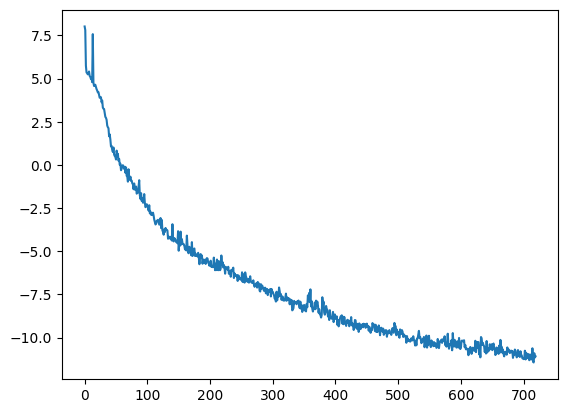

(2, 58739, 5)
RMSE : [838.97186   65.4115   283.74158   52.868984 462.44693 ] MAE  : [328.1383    41.170593 121.62969   22.690022 248.00345 ] NLL : 6362.65625
I am random house id = 7800
I am pool houses [7800, 7536, 661, 8386, 9278, 1642, 8565, 5746, 9160, 8156]
(array([0]),)
[0]
0
-------------------------------------------Iteration No:----------------------------------------- -> 3.1


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 7800]


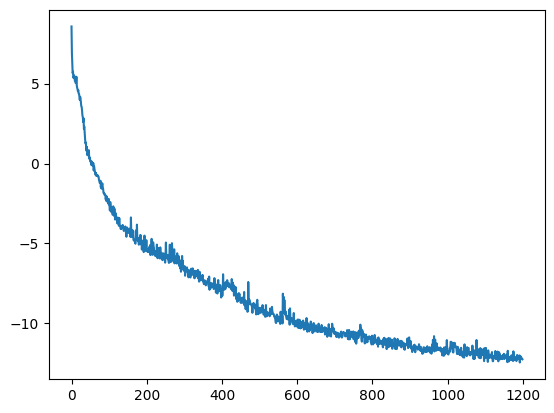

RMSE : [842.6275    62.942226 197.00385  104.06484  619.25037 ] MAE  : [328.25137   39.235123  93.42125   43.873745 341.5258  ] NLL : 41.19047546386719
-------------------------------------------Iteration No:----------------------------------------- -> 3.2


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 7800 7536]


2023-05-21 11:38:28.859645: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[116917,50,99]{2,1,0}, u8[0]{0}) custom-call(f32[116917,50,99]{2,1,0}, f32[50,50,5]{2,1,0}), window={size=5 pad=2_2}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


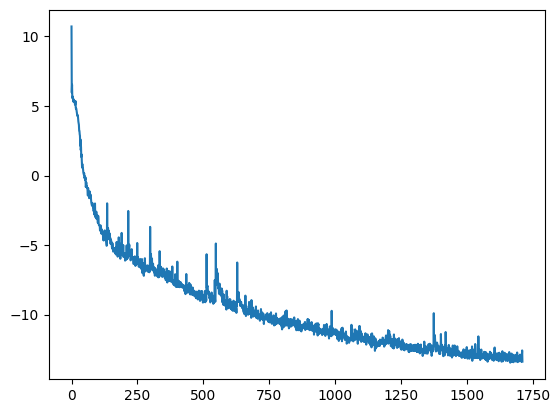

RMSE : [357.58618   61.756462  80.47123   72.922615 225.91528 ] MAE  : [138.27525   37.427864  38.907627  20.404636  89.63107 ] NLL : 4.881540298461914
-------------------------------------------Iteration No:----------------------------------------- -> 3.3


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 7800 7536  661]


2023-05-21 11:38:50.870775: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[163986,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[163986,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-21 11:38:51.737174: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[163986,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[163986,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-21 11:

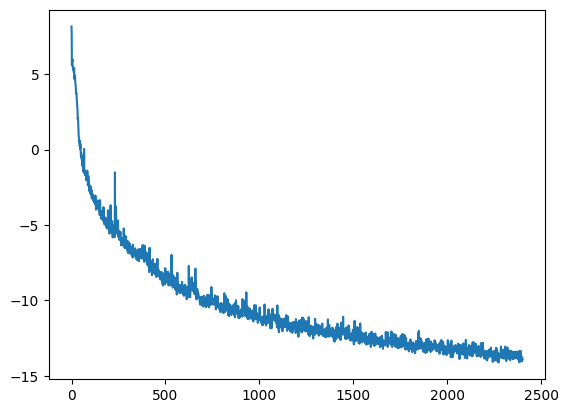

RMSE : [228.11948  58.33439  69.78846  43.01694 146.97029] MAE  : [78.36963  34.39664  34.611256 10.225168 50.948254] NLL : 4.528967380523682
-------------------------------------------Iteration No:----------------------------------------- -> 3.4


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 7800 7536  661 8386]


2023-05-21 11:39:22.268617: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[228338,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[228338,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-21 11:39:23.432739: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[228338,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[228338,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-21 11:

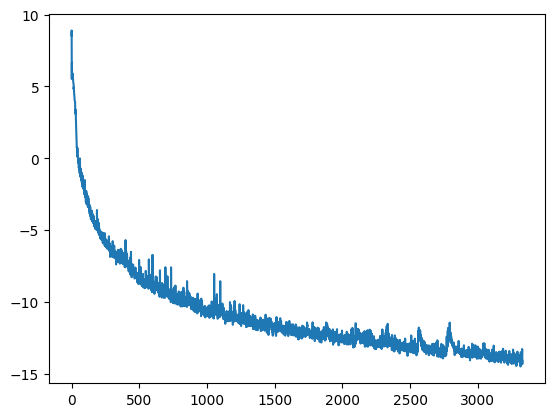

RMSE : [253.26064   54.781734  83.4331    30.152615  93.84031 ] MAE  : [86.12026   31.327932  39.688534   7.8171086 26.79731  ] NLL : 4.43985652923584
-------------------------------------------Iteration No:----------------------------------------- -> 3.5


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 7800 7536  661 8386 9278]


2023-05-21 11:40:02.477164: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[288189,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[288189,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-21 11:40:03.911456: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[288189,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[288189,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-21 11:

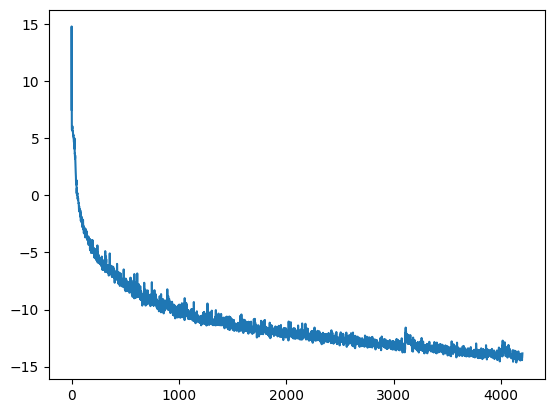

RMSE : [188.01096   54.929058  76.90228   21.212336  56.845966] MAE  : [65.49511  31.402025 36.004826  4.801716  8.753053] NLL : 5.189670562744141
-------------------------------------------Iteration No:----------------------------------------- -> 3.6


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 7800 7536  661 8386 9278 1642]


2023-05-21 11:40:51.419358: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[355305,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[355305,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-21 11:40:53.168508: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[355305,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[355305,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-21 11:

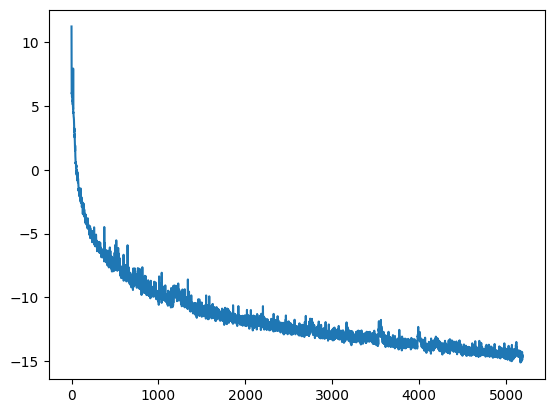

RMSE : [198.15941   53.292274  73.193474  23.367403  56.52237 ] MAE  : [66.57237  29.356031 33.90539   5.677032  8.234897] NLL : 7.856389045715332
-------------------------------------------Iteration No:----------------------------------------- -> 3.7


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 7800 7536  661 8386 9278 1642 8565]


2023-05-21 11:41:50.335737: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[430109,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[430109,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-21 11:41:52.425959: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[430109,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[430109,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


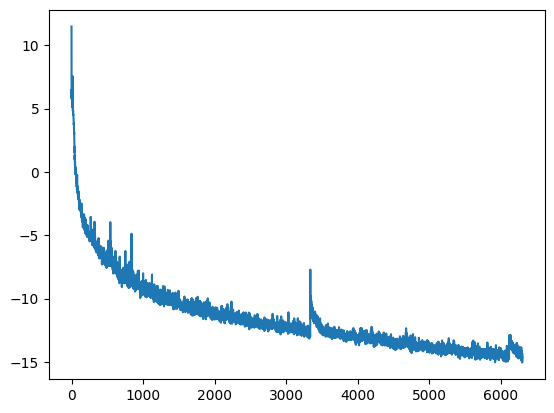

RMSE : [190.50557   52.10989   80.64628   21.703007  60.708298] MAE  : [63.4747   28.779213 37.169502  5.455253  9.558127] NLL : 5.550536155700684
-------------------------------------------Iteration No:----------------------------------------- -> 3.8


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 7800 7536  661 8386 9278 1642 8565 5746]


2023-05-21 11:42:59.175040: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[504654,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[504654,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-21 11:43:01.575917: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[504654,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[504654,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


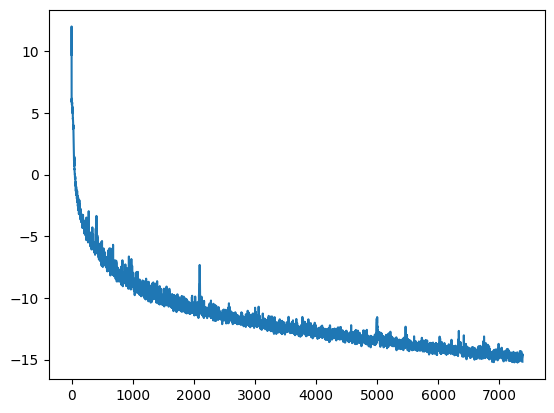

RMSE : [156.34373   49.93144   73.62235   19.789158  56.261227] MAE  : [55.103836  26.835518  34.559544   4.2186465  6.438849 ] NLL : 6.970585346221924
-------------------------------------------Iteration No:----------------------------------------- -> 3.9


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 7800 7536  661 8386 9278 1642 8565 5746 9160]


2023-05-21 11:44:19.504040: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[583794,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[583794,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-21 11:44:22.295185: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[583794,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[583794,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


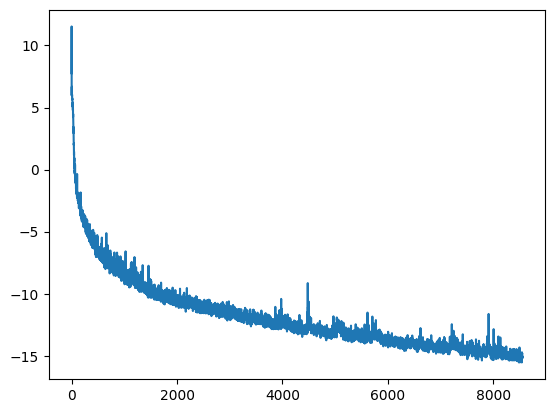

RMSE : [131.02687   50.356586  71.09872   19.560461  54.821476] MAE  : [43.501045  27.104408  32.766926   3.7365894  5.847478 ] NLL : 32.660831451416016


In [ ]:
total_rmse=[]
houseids=[]

all_rmses = dict()
all_maes = dict() 
all_preds = dict() 

# batch_size = batch_size_dict[appliance_name]
# learning_rate = learning_rate_dict[appliance_name]

iteration_number = f'{start_iter}_{end_iter}_iterations'

print(f"STARTING FOR all appliances, FOR ITERATIONS - {start_iter} to {end_iter}")

for i in range(start_iter,end_iter): #total 10 iterations

    print(f"############################################Random iteration number#################################### : {i+1}")

    train_houses = train_list[0]
    test_houses = test_list[0]
    pool_houses = random_picks[i]

    print(f"I am pool houses picck {pool_houses}")
    
    
    train = data_aggregated[data_aggregated["dataid"].isin(train_houses)] 
    test = data_aggregated[data_aggregated["dataid"].isin(test_houses)]

    all_rmses[i] = []
    all_maes[i] = []
    all_preds[i] = []
    
    houses=[]
    start= ["2018-03-01 00:00:00-06","2018-03-11 00:00:00-06","2018-03-16 00:00:00-06","2018-03-21 00:00:00-06","2018-03-26 00:00:00-06","2018-04-01 00:00:00-06", "2018-04-06 00:00:00-06", "2018-04-11 00:00:00-06", "2018-04-16 00:00:00-06", "2018-04-21 00:00:00-06"]
    end=   ["2018-03-10 23:59:00-06","2018-03-15 23:59:00-06","2018-03-20 23:59:00-06","2018-03-25 23:59:00-06","2018-03-31 23:59:00-06","2018-04-05 23:59:00-06", "2018-04-10 23:59:00-06", "2018-04-15 23:59:00-06", "2018-04-20 23:59:00-06", "2018-04-25 23:59:00-06"]
    for j in range(len(start)):
        
        
        print(f"-------------------------------------------Iteration No:----------------------------------------- -> {i}.{j}")

        if(j==0):
            rmsee, maes, train, test,current_pred = retrain_random(0, start[j], end[j], train, test, data_aggregated)
            all_rmses[i].append(rmsee)
            all_maes[i].append(maes)
            all_preds[i].append(current_pred)

            random_house_id = random_picks[i][j]
            print(f"I am random house id = {random_house_id}")
            print(f"I am pool houses {pool_houses}")
            print(f"{np.where(np.array(pool_houses)==random_house_id)}")
            print(f"{np.where(np.array(pool_houses)==random_house_id)[0]}")
            print(f"{np.where(np.array(pool_houses)==random_house_id)[0][0]}")
            random_house_index = np.where(np.array(pool_houses)==random_house_id)[0][0]  

            houses.append(random_house_id)
            pool_houses= np.delete(pool_houses, random_house_index)
            # break #REMOVE AT THE END

        elif(j==10):
            rmsee, maes, train, test,current_pred = retrain_random(random_house_id, start[j], end[j],train, test, data_aggregated)
            all_rmses[i].append(rmsee)
            all_maes[i].append(maes)
            all_preds[i].append(current_pred)

        else:
            rmsee, maes, train, test,current_pred = retrain_random(random_house_id, start[j], end[j],train, test, data_aggregated)
            all_rmses[i].append(rmsee)
            all_maes[i].append(maes)
            all_preds[i].append(current_pred)

            random_house_id = random_picks[i][j]
            
            random_house_index = np.where(np.array(pool_houses)==random_house_id)[0][0]  
            
            houses.append(random_house_id)
            pool_houses= np.delete(pool_houses, random_house_index)
        
        
    
    houseids.append(houses)





In [4]:
appliances = ['air', 'refrigerator', 'furnace', 'clotheswasher', 'dishwasher']
for i in range(5):
    for iteration_number in range(start_iter, end_iter):
        name_of_file_rmses = "final_random"+"_"+str(iteration_number) + "RMSES"+".csv"
        name_of_file_maes = "final_random"+"_"+str(iteration_number) + "MAES"+".csv"
        # name_of_file_preds = str(random)+"_"+str(iteration_number)+"PREDS"+".csv"

        if not os.path.exists(f'{appliances[i]}'):
            os.mkdir(f'{appliances[i]}')

        # Save the DataFrame to a CSV file
        pd.DataFrame(all_rmses[iteration_number])[i].to_csv(os.path.join(f'{appliances[i]}', f'{name_of_file_rmses}'), index=False)
        pd.DataFrame(all_maes[iteration_number])[i].to_csv(os.path.join(f'{appliances[i]}', f'{name_of_file_maes}'), index=False)
# pd.DataFrame(all_preds).to_csv(os.path.join(f'{appliance}', f'{name_of_file_preds}'), index=False)

NameError: name 'all_rmses' is not defined

: 